# Домашнее задание №5

Задание выполнил(а): `Олег Голещихин`

### Общая информация

__Дата выдачи:__ 2.04.2021

__Дедлайн:__ 16.04.2021 23:30



### О задании

Часть 1 содержит практическое задание на применение методов KMeans и DBSCAN.

Часть 2 содержит практическое задание на реализацию метода KMeans.

Часть 3 содержит практическое задание на снижение размерности с помощью PCA и кластеризацию табличных данных.


### Оценивание и штрафы


#### 1. k-means and DBSCAN на картинках [4 балла]
* [Задание 1](#task1) [2 балла]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]

#### 2. k-means своими руками [4 балла]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [3 балла]

#### 3. PCA + кластеризация [6 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [1 балл]
* [Задание 5](#task3_5) [2 балла]

Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{14},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/770). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = (8, 5)
%matplotlib inline

# Часть 1. Кластеризация цифр.

В этом задании вам нужно будет кластеризовать изображения цифр. В данном случае одна картинка - это один объект (признаков столько, сколько на картинке пикселей).

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits = digits["data"]

Число объектов и признаков:

In [5]:
digits.shape

(1797, 64)

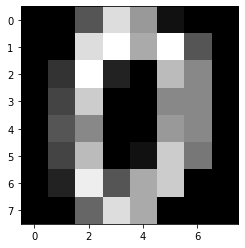

In [6]:
# Каждый объект - изображение цифры размеров 8 x 8
plt.imshow(digits[0].reshape(8, 8), cmap="gray")
plt.show()

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Задание 1 [2 балла] <a id="task1"></a>

Кластеризуйте цифры методами кластеризации k-means ([`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)) и DBSCAN ([`sklearn.cluster.DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)). Измерьте качество кластеризации с помощью метрики Silhouette Coefficient ([`sklearn.metrics.silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)).

In [306]:
# your code here
k_means = KMeans(n_clusters=10)
k_means.fit(digits)
clusters = k_means.predict(digits)
print('Silhoette score for K-Means:', silhouette_score(digits, clusters))

Silhoette score for K-Means: 0.18269590093242685


Как оказалось, решать задачу с помощью DBSCAN сильно сложнее, чем с помощью K-Means. В случае с K-Means понятно, что кластеров должно быть 10 (поскольку в датасете 10 цифр) и одного этого гиперпараметра достаточно, чтобы K-Means как-то решил данную задачу. В случае с DBSCAN нужно подбирать два параметра *eps* и *min_sample*, и хорошо бы сделать это так, чтобы он тоже нашел все 10 цифр. Попробуем подобрать значения этих параметров "по-умному".

In [3]:
# посчитаем матрицу расстояний между объектами нашего датасета
from scipy.spatial import distance_matrix 

In [10]:
d_matrix = distance_matrix(digits, digits)
d_matrix.shape

(1797, 1797)

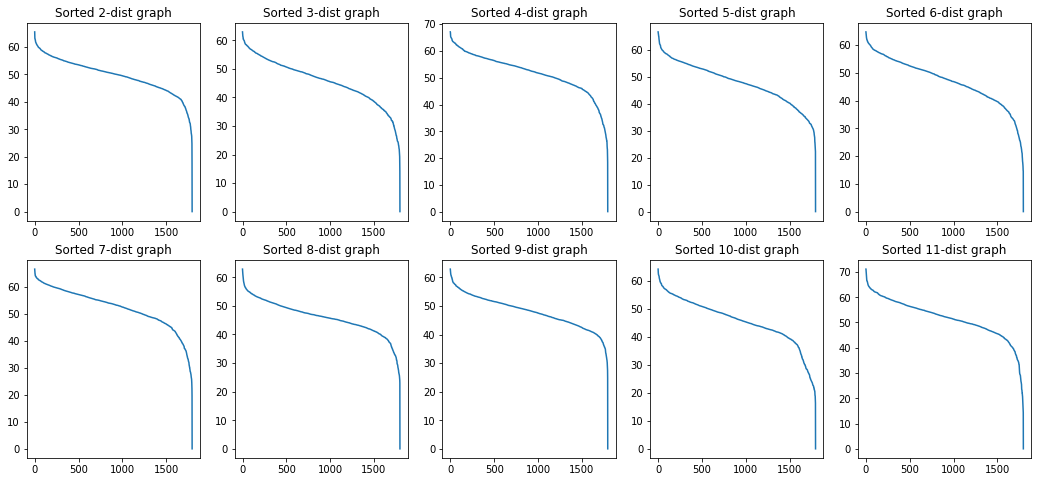

In [31]:
# Попробуем построить несколько k-dist графиков
plt.figure(figsize=(18, 8))
n = 1
for i in range(2, 12):
    plt.subplot(2, 5, n)
    plt.plot(range(d_matrix.shape[0]), np.sort(d_matrix[:, i])[::-1])
    plt.title('Sorted {}-dist graph'.format(i))
    n += 1
plt.show()

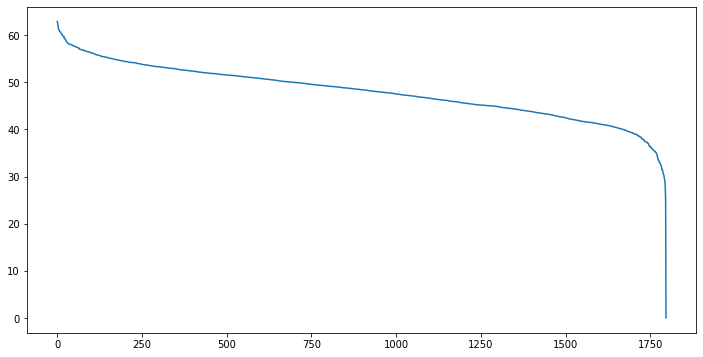

In [92]:
# Рассмотрим один пример такого графика подробнее
plt.figure(figsize=(12, 6))
plt.plot(range(d_matrix.shape[0]), np.sort(d_matrix[:, 9])[::-1])
plt.show()

In [93]:
# еще посмотрим примеры некоторых квантилей расстояний до 10-го соседа
np.quantile(d_matrix[:, 9], [0.01, 0.03, 0.05, 0.1])

array([32.85725349, 37.11009376, 38.97435054, 40.93897898])

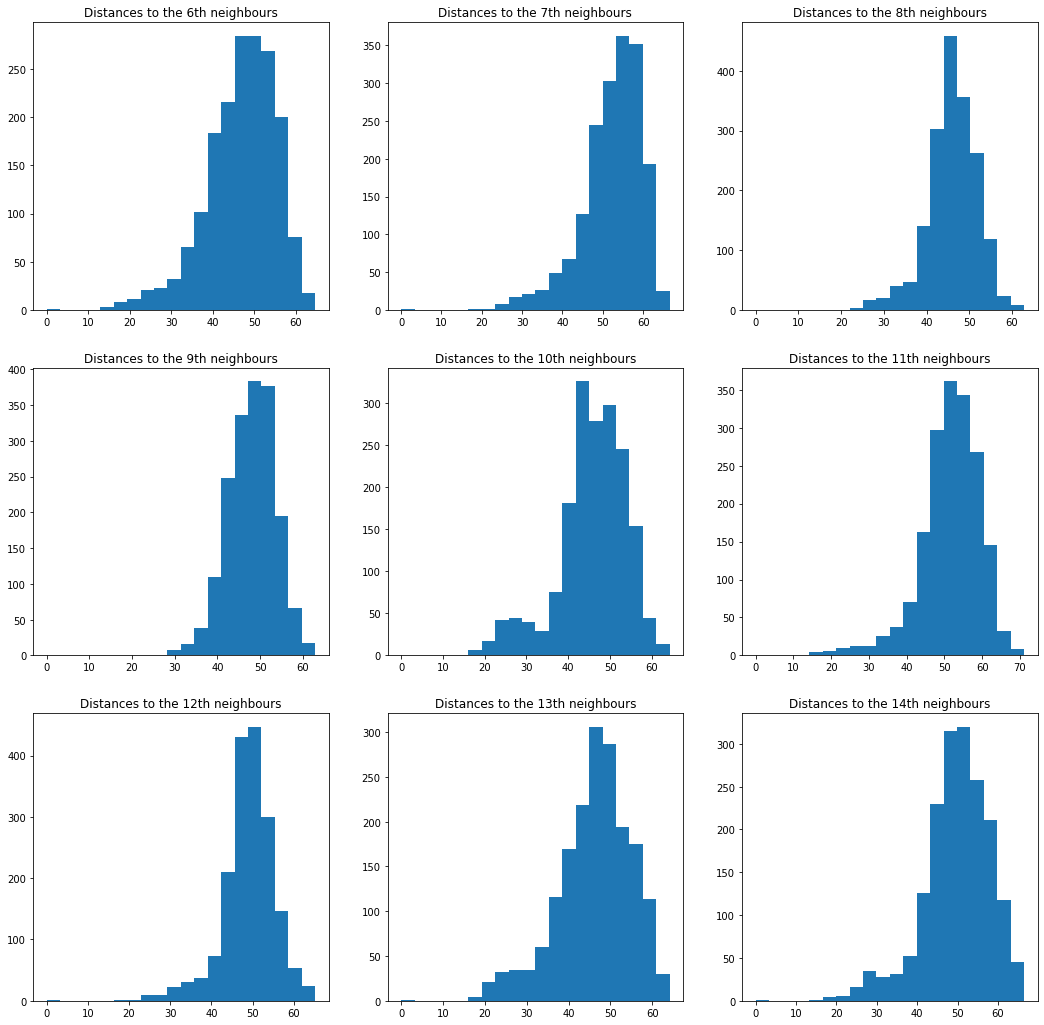

In [11]:
# еще посмотрим гистограммы расстояний
plt.figure(figsize=(18, 18))
n = 1
for i in range(6, 15):
    plt.subplot(3, 3, n)
    plt.hist(d_matrix[:, i], bins=20)
    plt.title('Distances to the {}th neighbours'.format(i))
    n += 1
plt.show()

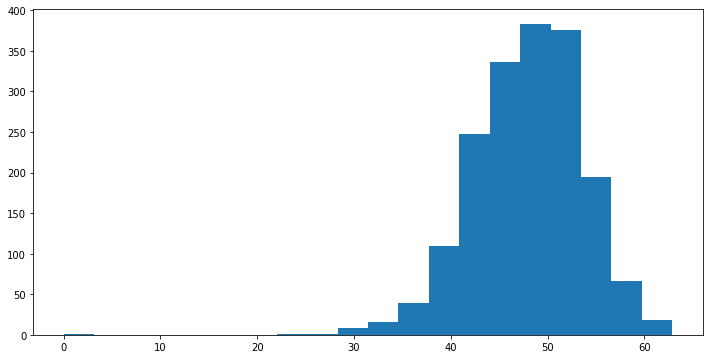

In [94]:
# и рассмотрим одну гистограмму подробнее
plt.figure(figsize=(12, 6))
plt.hist(d_matrix[:, 9], bins=20)
plt.show()

В этом месте нужно заметить, что я так и не понял, какие конкретно значения параметров стоит брать. Но кажется, что рассмтояния между соседями меняется примерно в одних и тех же интервалах (грубо говоря, от 20 до 60) независимо от того, какого по счету соседа брать. Это видимо, связано с тем, что мы имеем дело с десятимерным пространством, и координаты у всех точек в нем меняются в ограниченном интервале (от 0 до 15). В общем, придется подбирать параметры "в лоб".

In [80]:
# В итоге остановился на таких параметрах, как они были подобраны показано ниже.
dbsc = DBSCAN(eps=24, min_samples=10)
dbsc_clusters = dbsc.fit_predict(digits)
print('Silhoette score for DBSCAN:', silhouette_score(digits, dbsc_clusters))

Silhoette score for DBSCAN: 0.08626205764970492


In [82]:
np.unique(dbsc.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [83]:
outliers = 0
for i in dbsc.labels_:
    if i == -1:
        outliers += 1
outliers

201

Будем подбирать параметры для DBSCAN в лоб.

In [73]:
est=[]
for i in range(5,50,1): # цикл для расстояний
    for j in range(4,30,1): # цикл для соседей
        db = DBSCAN(eps=i, min_samples=j)
        db_clusters = db.fit_predict(digits)
        
        n_clusters = len(np.unique(db.labels_)) # смотрим, сколько получилось кластеров
        
        outliers = 0
        for l in db.labels_: # смотрим, сколько получилось выбросов
            if l == -1:
                outliers += 1
        
        try:
            sc = silhouette_score(digits, db_clusters) # считем качество кластеризации
            est.append([sc, i, j, n_clusters, outliers]) # записываем соответствующие параметры
        except:
            est.append([-100, i, j, n_clusters, outliers])

In [75]:
sorted(est, reverse=True)

[[0.1690150637010837, 34, 29, 2, 1],
 [0.1690150637010837, 34, 28, 2, 1],
 [0.1690150637010837, 34, 27, 2, 1],
 [0.1690150637010837, 34, 26, 2, 1],
 [0.1690150637010837, 34, 25, 2, 1],
 [0.1690150637010837, 33, 29, 2, 1],
 [0.1690150637010837, 33, 28, 2, 1],
 [0.1690150637010837, 33, 27, 2, 1],
 [0.1690150637010837, 33, 26, 2, 1],
 [0.1690150637010837, 33, 25, 2, 1],
 [0.1690150637010837, 33, 24, 2, 1],
 [0.1690150637010837, 33, 23, 2, 1],
 [0.14419310398612614, 25, 27, 9, 487],
 [0.14404134923196563, 24, 20, 10, 467],
 [0.1429248108691873, 24, 19, 10, 433],
 [0.14274227887862326, 24, 18, 10, 422],
 [0.14257232413489934, 25, 26, 10, 455],
 [0.1379003629523635, 24, 21, 10, 500],
 [0.13578646032903785, 25, 28, 10, 504],
 [0.13401108315985796, 24, 22, 10, 514],
 [0.13391349217081314, 24, 17, 12, 360],
 [0.13220684963758067, 25, 24, 9, 414],
 [0.13160173414440784, 25, 29, 10, 528],
 [0.12842903713861298, 25, 25, 9, 432],
 [0.12648071256108126, 23, 16, 12, 517],
 [0.12644047085929663, 25, 2

In [78]:
# а теперь выберем только те варианты, где кластеров 11 (10 цифр и 1 кластер на выбросы, как хотелось бы получить в идеале..)
est_11=[]
for x in est:
    if x[3]==11:
        est_11.append(x)

In [79]:
sorted(est_11, reverse=True)

[[0.11598660608703212, 24, 24, 11, 594],
 [0.11171843726487149, 24, 25, 11, 611],
 [0.1079801244756023, 24, 26, 11, 630],
 [0.10563313223012216, 24, 27, 11, 642],
 [0.1025583152846304, 24, 28, 11, 657],
 [0.09667726143931621, 23, 12, 11, 353],
 [0.09310956316652998, 23, 13, 11, 380],
 [0.08626205764970492, 24, 10, 11, 201],
 [0.0762743112857404, 23, 23, 11, 762],
 [0.07419308998550939, 23, 9, 11, 278],
 [0.051960016475494954, 22, 20, 11, 852],
 [0.03312672985329208, 23, 5, 11, 164],
 [0.02408022331501248, 23, 6, 11, 187],
 [-0.027457216248967468, 21, 19, 11, 1092],
 [-0.0853385897346606, 17, 7, 11, 1397],
 [-0.10426327105096544, 18, 10, 11, 1365],
 [-0.10996332089122005, 18, 11, 11, 1379],
 [-0.11632057967164888, 17, 8, 11, 1449],
 [-0.22908768455374987, 14, 5, 11, 1671]]

Выберем eps=24 и min_sample=10. Для этих параметров получилось достаточно высокая (для нашего списка) silhouette score, и при этом сравнительно немного выбросов.

### Задание 2 [1 балл] <a id="task2"></a>

Для кластеризации методом k-means визуализируйте картинки - центры кластеров (метод `.cluster_centers_` у KMeans).

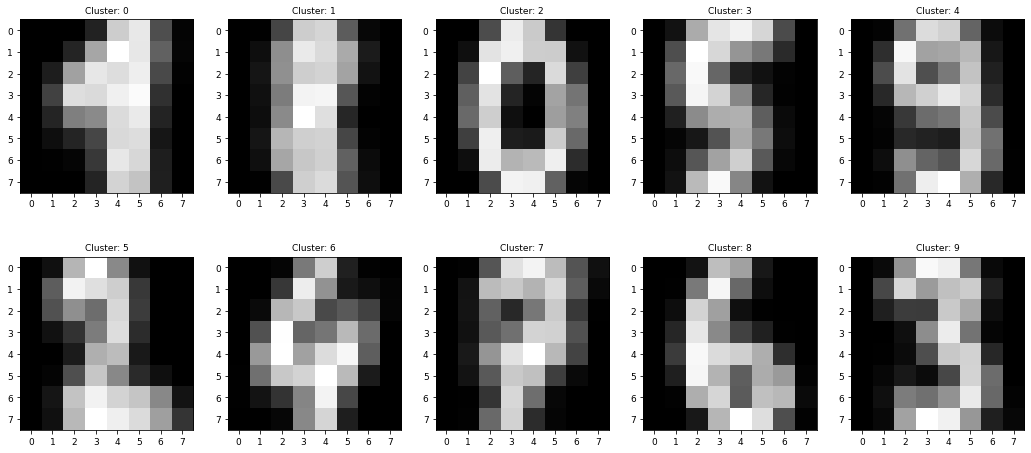

In [16]:
# your code here
plt.figure(figsize=(18, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(k_means.cluster_centers_[i].reshape(8, 8), cmap="gray")
    plt.title('Cluster: {}'.format(i), fontsize=9)
    plt.xticks(np.arange(0,8), fontsize=9)
    plt.yticks(np.arange(0,8), fontsize=9)
plt.show()

### Задание 3 [1 балл] <a id="task3"></a>

Для кластеризации методом DBSCAN выведите три случайно выбранные картинки из каждого кластера.

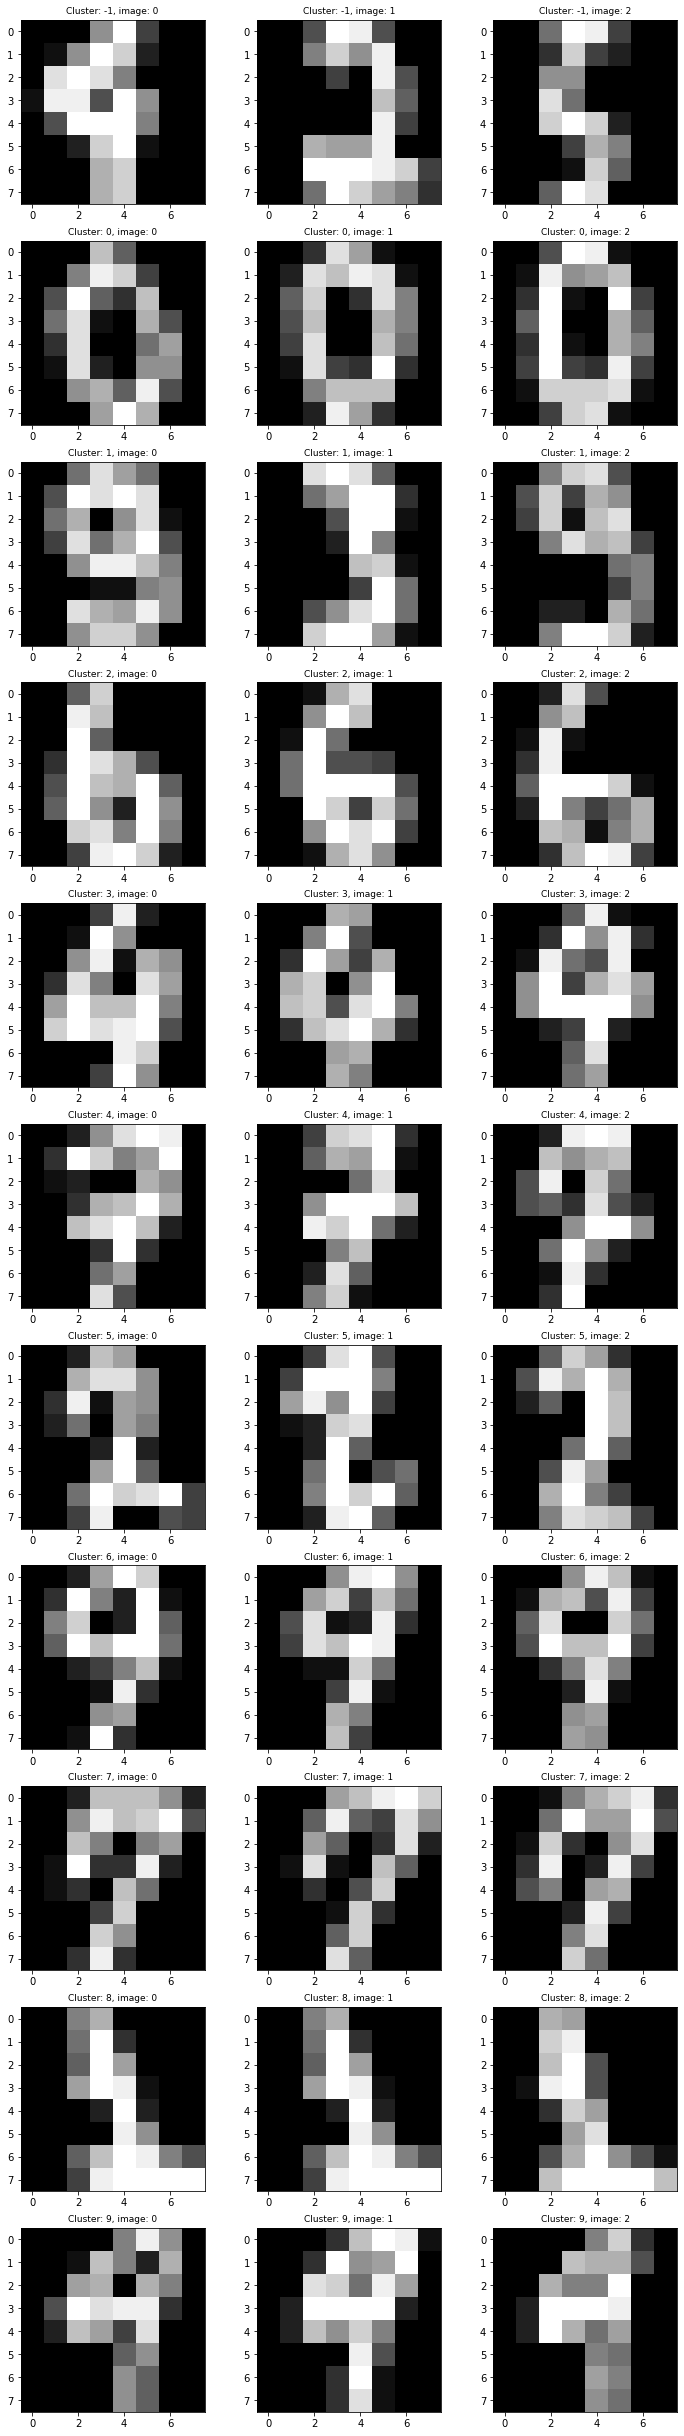

In [124]:
i = 1
plt.figure(figsize=(12, 44))

for cluster_num in np.unique(dbsc.labels_):
    img1, img2, img3 = np.random.randint(0, digits[dbsc.labels_==cluster_num, :].shape[0], size=3)
    n = 0
    
    plt.subplot(11, 3, i)
    plt.imshow(digits[dbsc.labels_==cluster_num, :][img1].reshape(8, 8), cmap="gray")
    plt.title('Cluster: {}, image: {}'.format(cluster_num, n), fontsize=9)
    i += 1
    n += 1
    
    plt.subplot(11, 3, i)
    plt.imshow(digits[dbsc.labels_==cluster_num, :][img2].reshape(8, 8), cmap="gray")
    plt.title('Cluster: {}, image: {}'.format(cluster_num, n), fontsize=9)
    i += 1
    n += 1
    
    plt.subplot(11, 3, i)
    plt.imshow(digits[dbsc.labels_==cluster_num, :][img3].reshape(8, 8), cmap="gray")
    plt.title('Cluster: {}, image: {}'.format(cluster_num, n), fontsize=9)
    i += 1
    n += 1

plt.show()

Кажется, что мы выбрали не самый лучший вариант кластеризации с использованием DBSCAN.. Не все цифры можно распознать, да и наполнение 4 кластеров оказалось минимальным (см. ниже)..

In [106]:
# np.unique(dbsc.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([201, 177, 716, 178, 164, 152, 147,   9,  11,  27,  15], dtype=int64))

In [107]:
# dbsc.labels_==0

array([ True, False, False, ..., False, False, False])

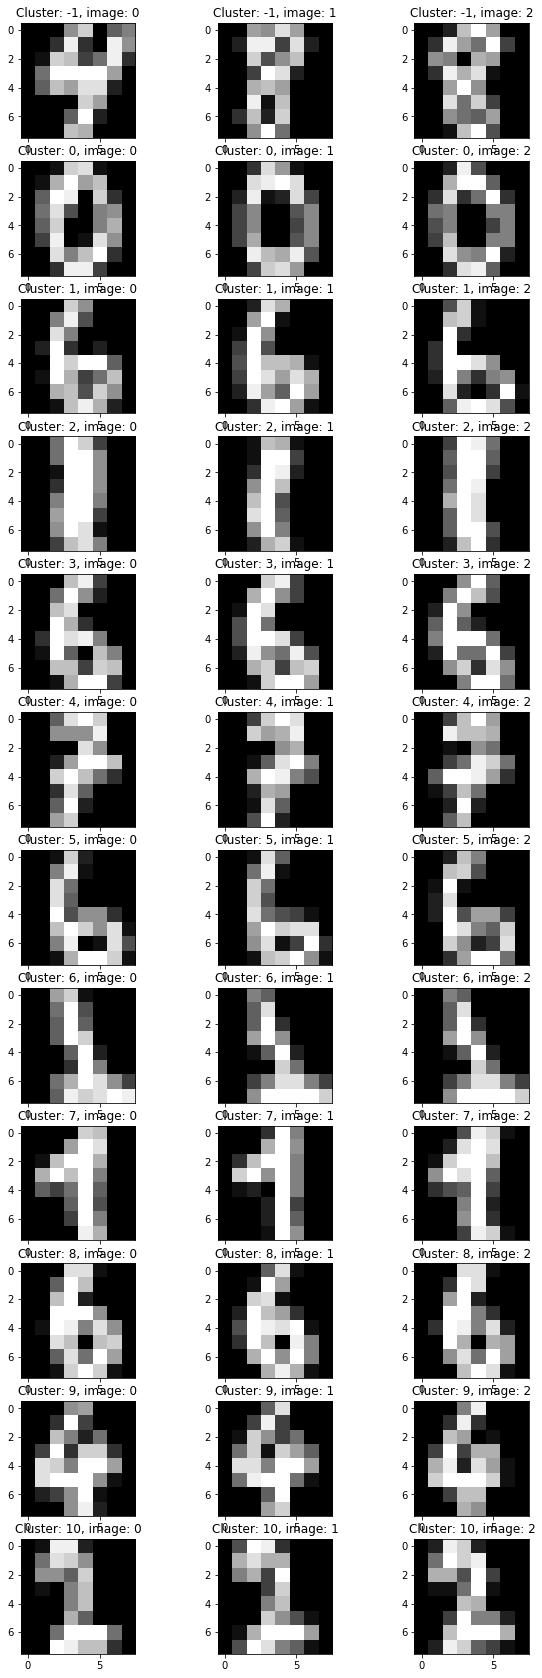

In [22]:
# your code here

# Часть 2. K-means своими руками

В этом задании вам нужно будет реализовать алгоритм K-Means. Для этого потребуется:

- следовать инструкциям
- воспользоваться базовыми техниками `numpy`
- понимание, что происходит в алгоритме K-Means

Сгенерируем случайную выборку. Матрица объекты-признаки находится в переменной $X$.

In [273]:
np.random.seed(13)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))

Визуализируем выборку:

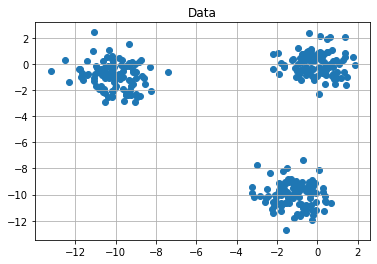

In [274]:
plt.scatter(X[:,0], X[:,1])
plt.title('Data')
plt.grid();

### Задание 1 [1 балл] <a id="task2_1"></a>

Чтобы реализовать алгоритм K-Means, нам понадобится вспомогательная функция. В процессе работы алгоритма мы все время обновляем значение целевой переменной для каждого объекта - то есть на каждом шаге вычисляем, к какому кластеру он относится. На каждом шаге нам известно, где находятся центры кластеров, так что задача - для каждого объекта посчитать расстояние до центров кластеров и выбрать ближайший из них в качестве ответа.

На практике это удобно сделать с помощью функции [`sklearn.metrics.pairwise_distances`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html). Она может принимать на вход два массива $X$ и $Y$, а на выходе предоставить матрицу расстояний, где в $i$-ой строке и $j$-ом столбце стоит расстояние между $i$-ым объектом в $X$ и $j$-ым объектом в $Y$.

Не воспрещается и реализовать это как-то по-другому.

Также в процессе вам возможно понадобится функция `np.argmin` (не забудьте про параметр `axis`!).

In [4]:
from sklearn.metrics import pairwise_distances

In [133]:
def compute_clusters(X, centers):
    """
    INPUT:
    X - np.array, (n_objects x n_features) - матрица объекты-признаки
    centers - np.array, (n_clusters x n_features) - матрица, содержащая координаты центров кластеров
    
    OUTPUT:
    y - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
    """
    # your code here
    dist = pairwise_distances(X, centers)
    y = np.argmin(dist, axis=1)
        
    return y

In [134]:
# check yourself
centers = (np.arange(6)*0.05).reshape(3, 2)
assert np.allclose(
    compute_clusters(X, centers), 
    np.array([0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
)

### Задание 2 [3 балла] <a id="task2_2"></a>

Реализуйте класс KMeans, обладающий методами `fit` (находит оптимальные центры кластеров) и `transform` (вычисляет, к какому кластеру относятся каждый объект выборки).

Метод `fit`:

1. Посчитайте, сколько объектов и признаков есть в выборке. **(0.33 балла)**
2. Инициализируйте $y$ - вектор длины `n_objects` (число объектов в выборке $X$), хранящий изначальные метки кластеров для объектов (можно воспользоваться функциями `np.empty`, `np.random.randint` или какими-то другими). **(0.33 балла)**
3. Создайте матрицу для хранения центров кластеров (размера `n_clusters x n_features`) - можно заполнить ее нулями. **(0.33 балла)**
4. На каждой итерации обновите центры кластеров. То есть для каждого кластера посчитайте центр тяжести по формуле ниже и переместите центр кластера туда:
$$
c_j = \frac{\sum\limits_{x \in C^j}x}{|C^j| + \varepsilon},
$$
где $c_j$ - центр тяжести, $C^j$ - кластер, $x$ - объект из кластера $C^j$ (вектор - в сумме мы просто складываем их координаты), $|C^j|$ - число объектов в кластере $C^j$, $\varepsilon$ - какое-то очень маленькое число (например, $10^{-6}$) для стабильности - чтобы мы не поделили на $0$, если в кластере $C^j$ нет объектов. Возможно, в этом задании вам понадобятся функции `sum`, `mean` - не забывайте про параметр `axis`! **(1 балл)**
5. После перемещения центров кластеров в центры тяжести обновите $y$ - чтобы отнести объекты к кластерам с пересчитанными центрами. Каждый объект будет относиться к тому кластеру, расстояние от центра которого до объекта наименьшее. (Вот тут вам понадобится функция `compute_clusters`). **(0.5 балл)**

Метод `transform`:

1. Для выборки $X$ посчитайте, к какому из найденных кластеров (с центрами в `self.centers`) относится каждый объект. Здесь вам тоже понадобится функция `compute_clusters`). **(0.5 балла)**.

In [158]:
class KMeans:
    def __init__(self, n_clusters):
        # гиперпараметр - количество кластеров
        self.n_clusters = n_clusters
        
    def fit(self, X, max_iter=10, visualize=False):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        max_iter - int - максимальное число итераций
        visualize - bool - визуализировать ли объекты и центры кластеров на каждой итерации 
        """
        # Цель: обучить центры кластеров self.centers, форма: число кластеров x число признаков
        
        # Шаг 1: сколько объектов и признаков?
        num_obj = X.shape[0] # your code here
        num_feat = X.shape[1] # your code here
        
        # Шаг 2: инициализируйте y - вектор длины n_objects, 
        # хранящий, к какому кластеру относится каждый объект
        # каждый элемент - случайно выбранный номер кластера 
        y = np.random.randint(self.n_clusters, size=num_obj) # your code here
        
        # Шаг 3: создайте матрицу для хранения центров кластеров
        self.centers = np.zeros((self.n_clusters, num_feat)) # your code here
        
        for n_iter in range(max_iter):
            # Шаг 4: обновите центры кластеров
            for cl in range(self.n_clusters):
                self.centers[cl] = np.sum(X[y==cl,:], axis=0)/(X[y==cl,:].shape[0] + 1e-6) # your code here
            
            # Шаг 5: обновите y. Для этого вычислите расстояния между всеми объектами 
            # и центрами кластеров (используйте pairwise_distances), 
            # затем найдите ближайший к каждому объекту кластер
            
            y = compute_clusters(X, self.centers) # your code here
            
            # Поддержка флага visualize
            if visualize:
                plt.figure(figsize=(5,5))
                plt.scatter(X[:, 0], X[:, 1], c=y)
                plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', marker='x')
                plt.title('Step {}'.format(n_iter + 1))
                plt.show()
    
    def transform(self, X):
        """
        INPUT:
        X - np.array, (n_objects x n_features) - матрица объекты-признаки
        
        OUTPUT:
        y_pred - np.array, (n_objects,) - вектор, состоящий из меток кластеров (0, 1, ..., self.n_clusters-1), где
    на i-ом месте стоит метка кластера для i-ого объекта выборки X
        """        
        # your code here
        y_pred = compute_clusters(X, self.centers)
        
        return y_pred

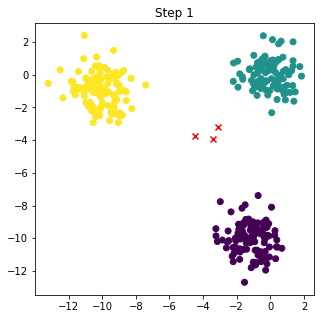

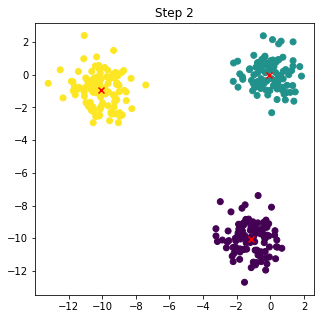

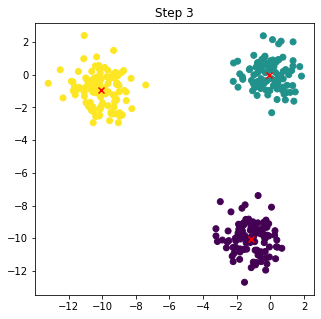

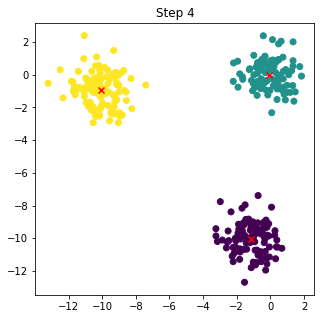

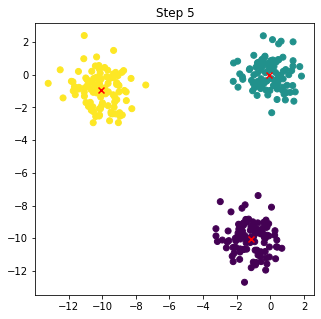

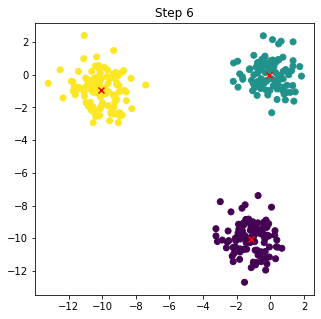

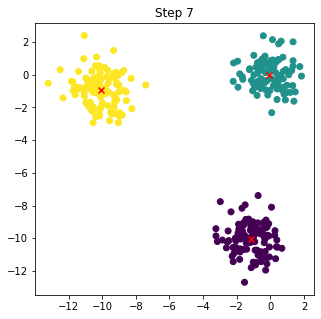

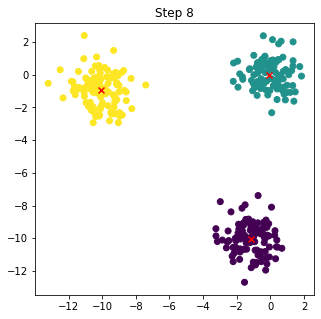

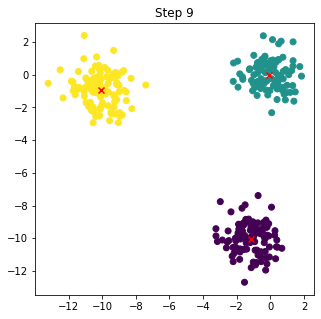

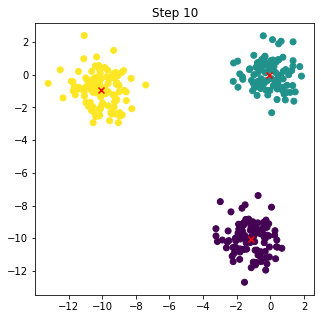

In [275]:
km = KMeans(3)
km.fit(X, visualize=True)
y = km.transform(X)

Итоговая кластеризация:

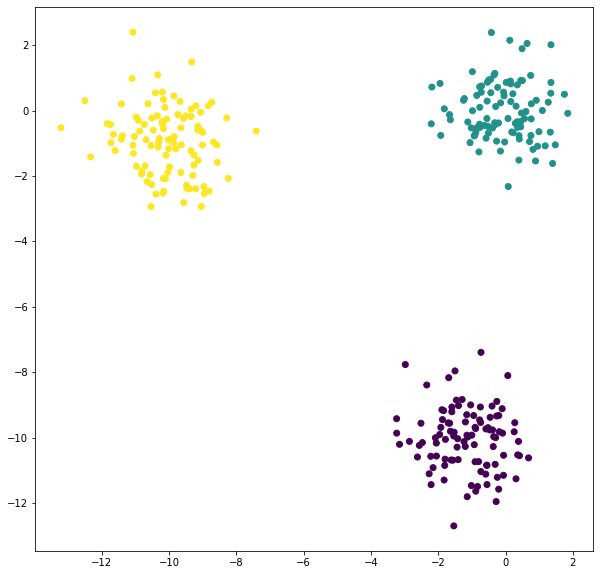

In [276]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Часть 3. Снижение размерности и Кластеризация

Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей только на основе имеющихся данных акселератора.

In [7]:
X = pd.read_csv('samsung_data.csv')
y = pd.read_csv('samsung_labels.csv')

In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [9]:
np.unique(y, return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=int64),
 array([1722, 1544, 1406, 1777, 1906, 1944], dtype=int64))

In [10]:
X.shape, y.shape

((10299, 561), (10299, 1))

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

### Задание 1 [1 балл] <a id="task3_1"></a>

Отмасштабируйте выборку с помощью StandardScaler. 

In [5]:
from sklearn.preprocessing import StandardScaler

In [11]:
# your code here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.210534,-0.068703,-0.452195,-0.883335,-0.945431,-0.744387,-0.874687,-0.944877,-0.773250,-0.868773,...,-0.819093,-0.000264,-0.299902,-0.357898,0.062039,-0.782988,-0.019034,-0.674432,0.382008,-0.016151
1,0.060208,0.035902,-0.275222,-0.890098,-0.929817,-0.860322,-0.883627,-0.927796,-0.858859,-0.884263,...,0.127803,-0.925905,-0.789555,0.135993,-0.022538,-1.217721,1.470315,-0.681360,0.383148,-0.000121
2,0.078460,-0.046427,-0.085548,-0.883565,-0.913598,-0.906457,-0.878093,-0.904569,-0.908437,-0.876139,...,1.172610,-0.287824,-0.461181,-0.375145,0.391762,0.134732,1.686961,-0.689471,0.384289,0.019214
3,0.071375,-0.227794,-0.270741,-0.885188,-0.946015,-0.935521,-0.879495,-0.943980,-0.938095,-0.876139,...,1.132149,0.566244,0.436736,-0.132194,-0.034739,1.010013,-0.982261,-0.688915,0.388536,0.024624
4,0.033738,0.031617,-0.121380,-0.889855,-0.940846,-0.935041,-0.882451,-0.937622,-0.940948,-0.883152,...,-0.158720,-0.165153,-0.263958,0.343504,0.268015,1.096950,-1.251689,-0.687381,0.399066,0.038649


### Задание 2 [1 балл] <a id="task3_2"></a>

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

**Hint:** Напомним, что у PCA есть атрибут `explained_variance_ratio_`

In [6]:
from sklearn.decomposition import PCA

In [12]:
# your code here
dec = PCA(random_state=111)
dec.fit(X_scaled)

PCA(random_state=111)

In [13]:
var_explained = 0
for i in range(561):
    var_explained += dec.explained_variance_ratio_[i]
    if var_explained >= 0.9:
        print('{} components explain {:.4f} of dispersion'.format(i, var_explained))
        break

64 components explain 0.9005 of dispersion


In [14]:
X_reduced = X_scaled.dot(dec.components_[:64, :].T)

In [15]:
X_reduced.shape

(10299, 64)

### Задание 3 [1 балл] <a id="task3_3"></a>


Визуализируйте данные (scatter plot) в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с настоящими классами (`y`).

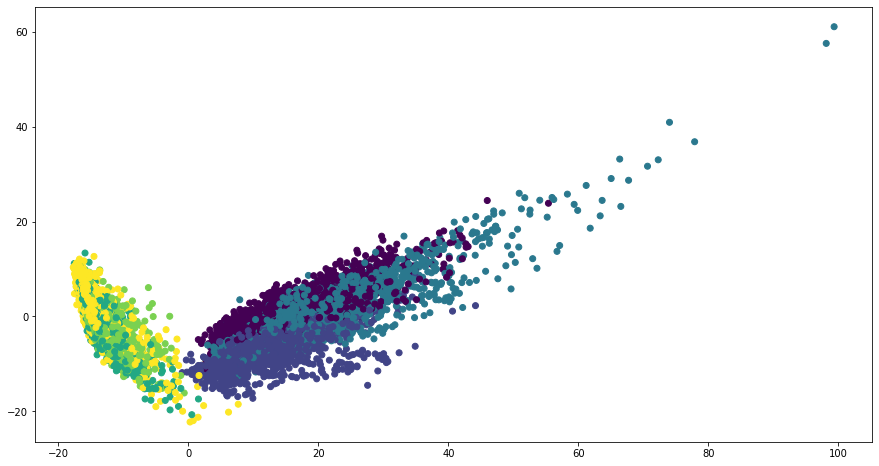

In [16]:
# your code here
plt.figure(figsize=(15, 8))
plt.scatter(X_reduced.values[:, 0], X_reduced.values[:, 1], c=y.values[:, 0])
plt.show()

### Задание 4 [1 балл] <a id="task3_4"></a>


Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов). 

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [17]:
# your code here
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_reduced.values)
cls = kmeans.predict(X_reduced.values)
print('Silhoette score for K-Means:', silhouette_score(X_reduced.values, cls))

Silhoette score for K-Means: 0.14093598643767682


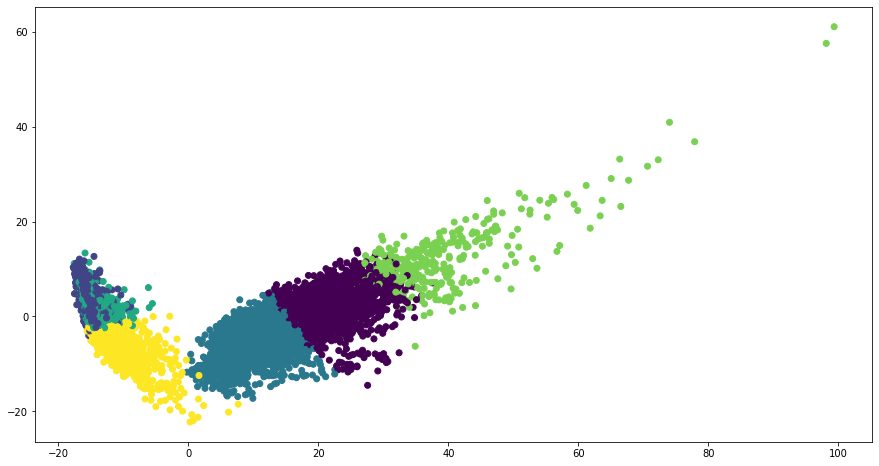

In [18]:
plt.figure(figsize=(15, 8))
plt.scatter(X_reduced.values[:, 0], X_reduced.values[:, 1], c=cls)
plt.show()

### Задание 5 [2 балла] <a id="task3_5"></a>


Сделайте кластеризацию данных методом DBSCAN. Подберите гипераметры `eps` и `min_samples` максимизируя метрику `silhouette_score`. Обучайте модель на данных со сниженной за счет PCA размерностью. Ваша цель получить модель с `silhouette_score` 0.47 или больше.

Сравните лучшую модель c k-means в терминах `silhouette_score`.

In [19]:
# YOUR CODE HERE
d_matrix = distance_matrix(X_reduced, X_reduced)
d_matrix.shape

(10299, 10299)

In [20]:
d_matrix

array([[ 0.        , 15.48362148, 16.52644086, ..., 35.7268468 ,
        33.3646169 , 33.74480515],
       [15.48362148,  0.        ,  7.34816519, ..., 32.65808781,
        28.92899935, 29.76886666],
       [16.52644086,  7.34816519,  0.        , ..., 32.25063835,
        28.56875936, 29.49298674],
       ...,
       [35.7268468 , 32.65808781, 32.25063835, ...,  0.        ,
        13.90903143, 12.57343277],
       [33.3646169 , 28.92899935, 28.56875936, ..., 13.90903143,
         0.        ,  9.45061703],
       [33.74480515, 29.76886666, 29.49298674, ..., 12.57343277,
         9.45061703,  0.        ]])

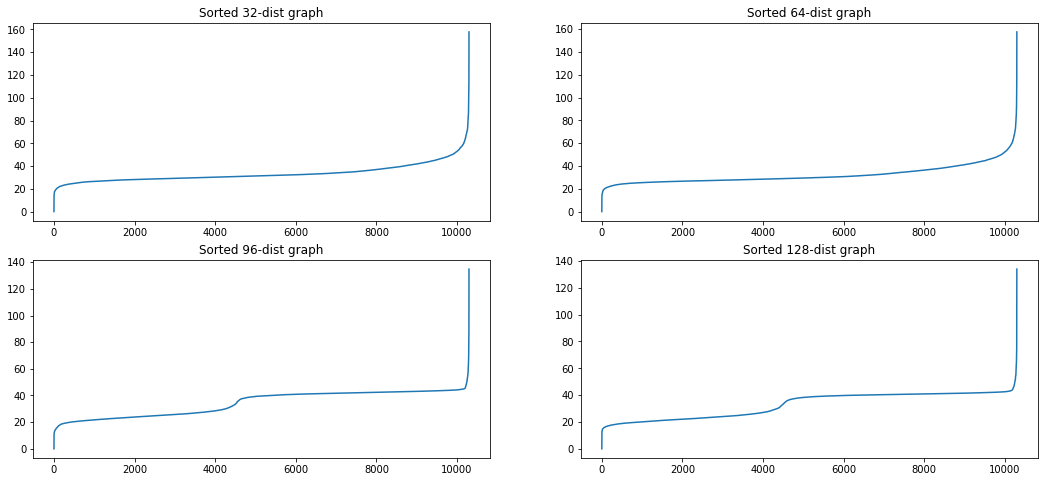

In [21]:
plt.figure(figsize=(18, 8))
n = 1
for i in [32, 64, 96, 128]:
    plt.subplot(2, 2, n)
    plt.plot(range(d_matrix.shape[0]), np.sort(d_matrix[:, i]))
    plt.title('Sorted {}-dist graph'.format(i))
    n += 1
plt.show()

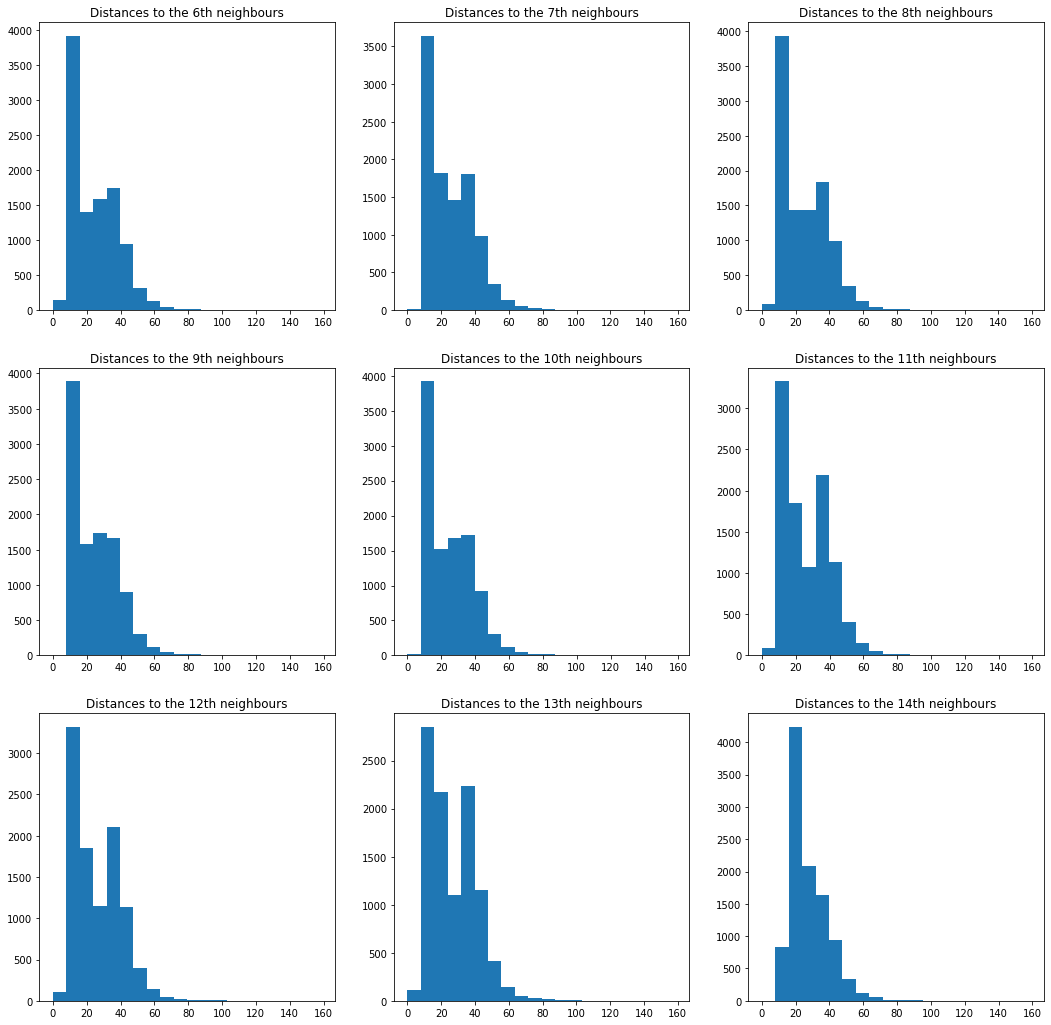

In [315]:
plt.figure(figsize=(18, 18))
n = 1
for i in range(6, 15):
    plt.subplot(3, 3, n)
    plt.hist(d_matrix[:, i], bins=20)
    plt.title('Distances to the {}th neighbours'.format(i))
    n += 1
plt.show()

In [357]:
est=[]
for i in range(1,51,1): # цикл для расстояний
    for j in range(2,50,2): # цикл для соседей
        db = DBSCAN(eps=i, min_samples=j)
        db_clusters = db.fit_predict(X_reduced)
        
        n_clusters = len(np.unique(db.labels_)) # смотрим, сколько получилось кластеров
        
        outliers = 0
        for l in db.labels_: # смотрим, сколько получилось выбросов
            if l == -1:
                outliers += 1
        
        try:
            sc = silhouette_score(X_reduced, db_clusters) # считем качество кластеризации
            est.append([sc, i, j, n_clusters, outliers]) # записываем соответствующие параметры
        except:
            est.append([-100, i, j, n_clusters, outliers])

In [358]:
sorted(est, reverse=True)

[[0.8020586268326197, 50, 48, 2, 2],
 [0.8020586268326197, 50, 46, 2, 2],
 [0.8020586268326197, 50, 44, 2, 2],
 [0.8020586268326197, 50, 42, 2, 2],
 [0.8020586268326197, 50, 40, 2, 2],
 [0.8020586268326197, 50, 38, 2, 2],
 [0.8020586268326197, 50, 36, 2, 2],
 [0.8020586268326197, 50, 34, 2, 2],
 [0.8020586268326197, 50, 32, 2, 2],
 [0.8020586268326197, 50, 30, 2, 2],
 [0.8020586268326197, 50, 28, 2, 2],
 [0.8020586268326197, 50, 26, 2, 2],
 [0.8020586268326197, 50, 24, 2, 2],
 [0.8020586268326197, 50, 22, 2, 2],
 [0.8020586268326197, 50, 20, 2, 2],
 [0.8020586268326197, 50, 18, 2, 2],
 [0.8020586268326197, 50, 16, 2, 2],
 [0.8020586268326197, 50, 14, 2, 2],
 [0.8020586268326197, 50, 12, 2, 2],
 [0.8020586268326197, 50, 10, 2, 2],
 [0.8020586268326197, 50, 8, 2, 2],
 [0.8020586268326197, 50, 6, 2, 2],
 [0.8020586268326197, 50, 4, 2, 2],
 [0.8020586268326197, 50, 2, 2, 0],
 [0.8020586268326197, 49, 48, 2, 2],
 [0.8020586268326197, 49, 46, 2, 2],
 [0.8020586268326197, 49, 44, 2, 2],
 [0.8

In [359]:
est_7=[]
for x in est:
    if x[2]==7:
        est_7.append(x)

In [360]:
sorted(est_7, reverse=True)

[]

In [119]:
db = DBSCAN(eps=50, min_samples=2)
db_clusters = db.fit_predict(X_reduced.values)
silhouette_score(X_reduced.values, db_clusters)

0.8020586268326197

In [120]:
np.unique(db.labels_, return_counts=True)

(array([0, 1], dtype=int64), array([10297,     2], dtype=int64))

In [38]:
from sklearn.neighbors import NearestNeighbors

In [89]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_reduced)
distances, indices = nbrs.kneighbors(X_reduced)

In [91]:
distances_ = np.sort(distances, axis=0)
distances_ = distances_[:,3]

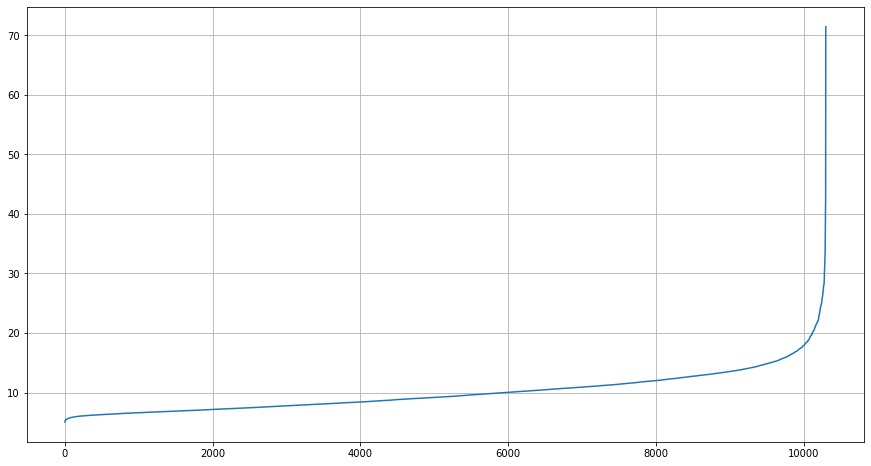

In [92]:
plt.figure(figsize=(15, 8))
plt.plot(distances_)
plt.grid()
plt.show()

In [93]:
distances

array([[8.25906185e-07, 9.54349012e+00, 1.21791297e+01, 1.25584377e+01],
       [0.00000000e+00, 6.57204830e+00, 7.14265125e+00, 7.29145891e+00],
       [0.00000000e+00, 6.05084536e+00, 6.44541736e+00, 6.48070120e+00],
       ...,
       [0.00000000e+00, 1.25734328e+01, 1.30585796e+01, 1.37800764e+01],
       [0.00000000e+00, 9.31647523e+00, 9.45061703e+00, 1.10273715e+01],
       [2.38418579e-07, 9.35775231e+00, 9.45061703e+00, 1.07350149e+01]])

In [94]:
indices

array([[    0,  3238,  3805,  2058],
       [    1,   857,  6262,  3612],
       [    2,  7380,  6483,  5707],
       ...,
       [10296, 10298, 10279,  6221],
       [10297, 10279, 10298,  6439],
       [10298, 10279, 10297,  3183]], dtype=int64)

In [ ]:
# YOUR CODE HERE: score for the best DBSCAN MODEL

In [ ]:
# YOUR CODE HERE: score for the  k-means MODEL